In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf

# import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [3]:
company = 'BHEL.NS'
start = dt.datetime(2012,1,1)
end = dt.datetime(2020,1,1)
print(end, type(end))

# data = web.DataReader(company, 'yahoo',start, end)
data = yf.download(company,start=start,end=end)

2020-01-01 00:00:00 <class 'datetime.datetime'>
[*********************100%%**********************]  1 of 1 completed


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
# scaled_data = data['Close'].values.reshape(-1,1)
prediction_days = 7

x_train = []
y_train = []


In [5]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))


In [6]:
model = Sequential()
model.add(LSTM(units=80, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=80, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80))
model.add(Dropout(0.2))
model.add(Dense(units=1))


c:\Code\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
print(len(x_train))

1959


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=40)


Epoch 1/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0726
Epoch 2/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0028
Epoch 3/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028
Epoch 4/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027
Epoch 5/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031
Epoch 6/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 7/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027
Epoch 8/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025
Epoch 9/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 10/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 11/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022
Epoch 12/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021
Epoch 13/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0022
Epoch 14/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022
Epoch 15/40
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024
Epoch 16/40
62/62 ━

In [9]:
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime.now()

# test_data = web.DataReader(company,'yahoo',test_start,test_end)
test_data = yf.download(company,start=test_start,end=test_end)
actual_prices = test_data['Close'].values

[*********************100%%**********************]  1 of 1 completed


In [10]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset)-len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


In [11]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test =np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


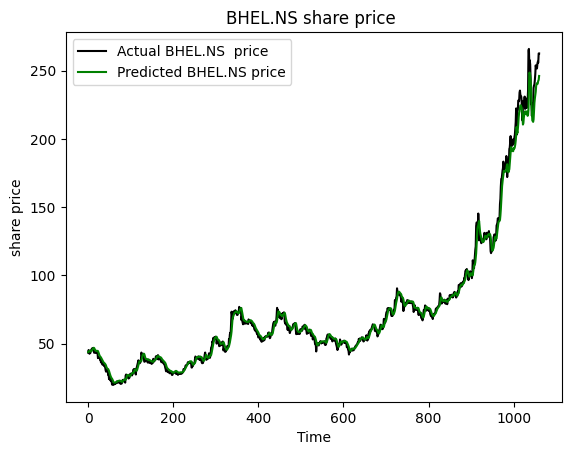

In [15]:
plt.plot(actual_prices,color="black",label=f"Actual {company}  price")
plt.plot(predicted_prices,color="green",label=f"Predicted {company} price")
plt.title(f"{company} share price ")
plt.xlabel('Time')
plt.ylabel('share price')
plt.legend()
plt.show()

In [13]:
real_data = [model_inputs[len(model_inputs) + 1 -prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data,(real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
Prediction: [[249.40894]]


In [14]:
for i in real_data:
    print(scaler.inverse_transform(i))

[[251.5       ]
 [254.94999695]
 [256.45001221]
 [255.75      ]
 [262.5       ]
 [262.5       ]]
